In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Exploring the Data

In [4]:
print(len(train_data))
print(train_data[0])
len(train_data[8981])

8982
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


105

In [5]:
print(len(train_labels))
train_labels

8982


array([ 3,  4,  3, ..., 25,  3, 25])

Decoding News Wire Back to text

In [6]:
word_index = reuters.get_word_index()
#print(word_index)
len(word_index.keys())

557056/550378 [==============================] - 0s 0us/step


30979

In [7]:
#print(word_index.items())
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#reverse_word_index
len(word_index.items())

30979

In [8]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[3]]) 
decoded_newswire

"? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely ? borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in ? financial eligibility standards indicated as many as one half of ? borrowers who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed evaluating ? credit using a variety of financial ratios instead of relying solely on ? ability senate agriculture committee chairman patrick leahy d vt ? the proposed eligibility changes telling ? administrator ? clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming a big city bank but

In [9]:
train_labels[3]

4

## Encoding the Data

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [12]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
print("training Data after one hot encoding:",x_train)
print("testing Data after one hot encoding:",x_test)

training Data after one hot encoding: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
testing Data after one hot encoding: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [17]:
#Encoding of Labels
#print(train_labels)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

## Model Defination

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential ()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

## Compiling The model

In [19]:
model.compile(optimizer= 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Seprating The Validation Data

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training The Model

In [21]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 3.1917 - accuracy: 0.4430 - val_loss: 1.8097 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4973 - accuracy: 0.7025 - val_loss: 1.3006 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0558 - accuracy: 0.7807 - val_loss: 1.1472 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8423 - accuracy: 0.8218 - val_loss: 1.0392 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6605 - accuracy: 0.8620 - val_loss: 0.9643 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5243 - accuracy: 0.8927 - val_loss: 0.9186 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4259 - accuracy: 0.9166 - val_loss: 0.9117 - val_accuracy: 0.8090
Epoch 8/20
16

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting the Training & Validation Loss

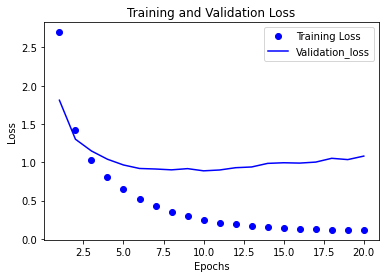

In [25]:
import matplotlib.pyplot as plt
loss= history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting The Training and Validation Accuracy

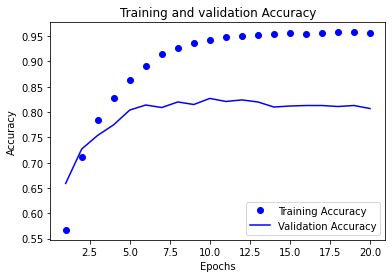

In [26]:
plt.clf()
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Retraining the model From Scratch

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 63ms/step - loss: 3.0354 - accuracy: 0.4047 - val_loss: 1.6524 - val_accuracy: 0.6650
Epoch 2/9
16/16 [==============================] - 1s 52ms/step - loss: 1.4605 - accuracy: 0.7035 - val_loss: 1.2744 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0265 - accuracy: 0.7807 - val_loss: 1.1337 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8206 - accuracy: 0.8213 - val_loss: 1.0524 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 1s 50ms/step - loss: 0.6412 - accuracy: 0.8621 - val_loss: 0.9709 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 1s 52ms/step - loss: 0.5340 - accuracy: 0.8869 - val_loss: 0.9675 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 1s 52ms/step - loss: 0.4222 - accuracy: 0.9157 - val_loss: 0.9156 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [29]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.0260 - accuracy: 0.7743


[1.0259729623794556, 0.7742653489112854]

## Generating Predictions for new Data

In [31]:
predictions = model.predict(x_test)
#print(predictions)
#print(predictions.shape)
print("length of predictions:",len(predictions))
#print(len(predictions[0]))
#print(predictions[0].sum())
#print(predictions[0].shape)
np.argmax(predictions[2])

length of predictions: 2246


1